<font color = green >

## Home Task
</font>

<font color = green>

### Brest Cancer Dataset

</font>



In [364]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [365]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [366]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Splitting data into training and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state = 42 )

# 2. Data pre-processing: standardization of features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# 3. MLP classifier training
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 50), max_iter=1000).fit(X_train, y_train)

# 4. Evaluation of the classifier:
# Performance evaluation on the training set
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("train accuracy= {:.3%}".format(train_accuracy))

# Performance evaluation on the test set
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("test accuracy= {:.3%}".format(test_accuracy))

# END_CODE 

train accuracy= 100.000%
test accuracy= 95.804%


<font color = green>

##  Signs dataset

</font>



In [367]:
# signs data set (fingers)
def load_dataset():
    cwd= os.getcwd() # current working directory
    path = os.path.join(cwd,'data') 
    
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [368]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()

print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [369]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)


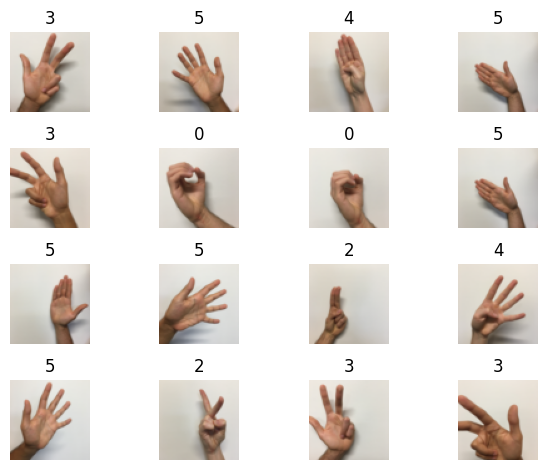

In [370]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [371]:
# Create a shape
fig = plt.figure()

# Setting the window title
fig.canvas.manager.set_window_title('Train set')

<Figure size 640x480 with 0 Axes>

In [372]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [373]:
# YOUR_CODE.  Preproces data
# START_CODE 

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))
print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [374]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE
 
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 50), max_iter=1000).fit(X_train_scaled, y_train)

print("train accuracy= {:.3%}".format(train_accuracy))
print("test accuracy= {:.3%}".format(test_accuracy))

# END_CODE     

train accuracy= 100.000%
test accuracy= 95.804%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

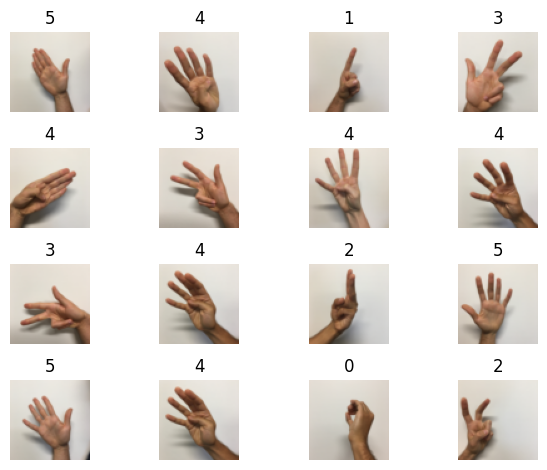

In [375]:
plt.figure()

display_samples_in_grid(X_test, n_rows=4, y= y_test)

In [376]:
# Create a shape
fig = plt.figure()

# Setting the window title
fig.canvas.manager.set_window_title('Test set prediction')

<Figure size 640x480 with 0 Axes>

### Compare with SVM 

In [377]:
from sklearn.svm import SVC

In [378]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%
